# Logistic Regression with Sklearn

- This notebook provides an example code of analyzing Employee attrition using logistic regression. The dependent variable(Y) is Attrition ("Yes", "No").

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression

In [156]:
data = pd.read_csv('attrition.csv')

In [157]:
data.shape

(1470, 35)

In [158]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [160]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [161]:
#checking number of duplicates, missing values
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())

Duplicates: 0
Missing values: 0


In [162]:
#cheking single valued columns
single_valued = data.columns[data.nunique()==1]
print(single_valued)

Index(['EmployeeCount', 'Over18', 'StandardHours'], dtype='object')


In [163]:
data=data.drop(single_valued,axis=1)

In [164]:
# ID column (either drop or set as index)
ids = data.columns[data.nunique()==data.shape[0]]
print(ids)

Index(['EmployeeNumber'], dtype='object')


In [165]:
data=data.set_index(ids[0])

# visualization

In [166]:
num_cols = data.columns[data.dtypes!="O"].tolist()
cat_cols = data.columns[data.dtypes=="O"].tolist()
cat_cols.remove('Attrition')
print('Numeric columns:' ,'\n',num_cols)
print('Categorical columns: ','\n',cat_cols)

Numeric columns: 
 ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical columns:  
 ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [167]:
data.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

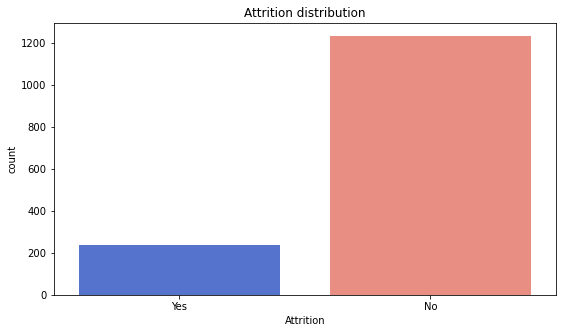

In [168]:
#let's visualise the distribution of churn
plt.figure(figsize=(9,5))
sns.countplot(data.Attrition,palette = ['royalblue','salmon'])
plt.title("Attrition distribution")
plt.show()

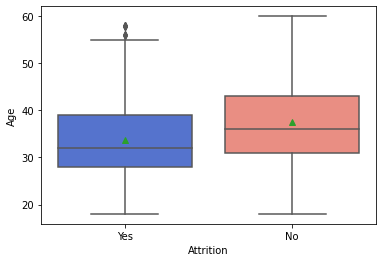

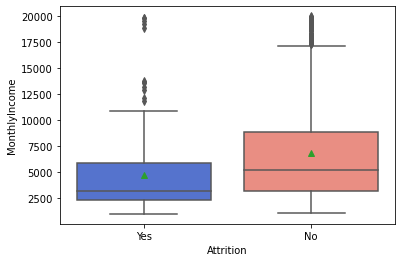

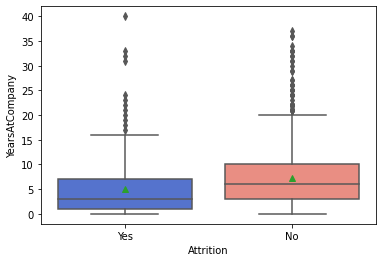

In [169]:
for i in ['Age','MonthlyIncome','YearsAtCompany']:
    sns.boxplot(data=data,y=i,x="Attrition", showmeans=True,palette = ['royalblue','salmon'])
    plt.show()

In [170]:
# making the target columns numeric (Yes=1, No=0)
data['Attrition'] = np.where(data['Attrition']=='Yes',1,0)

In [171]:
for i in cat_cols:
    print(i,data[i].value_counts(),'\n')

BusinessTravel Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

Department Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

EducationField Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

Gender Male      882
Female    588
Name: Gender, dtype: int64 

JobRole Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64 

MaritalStatus Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64 

OverTime No     1054
Yes     416
Name: Over

In [172]:
# It is not practical to have space in columns names and as we are going to create dummies 
# the values will become part of columns names 
#let's add _ instead of space
for i in cat_cols:
    data[i] = data[i].apply(lambda x: x.replace(' ','_'))

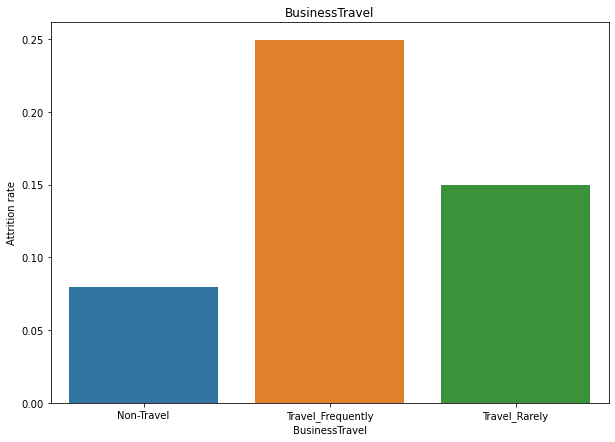

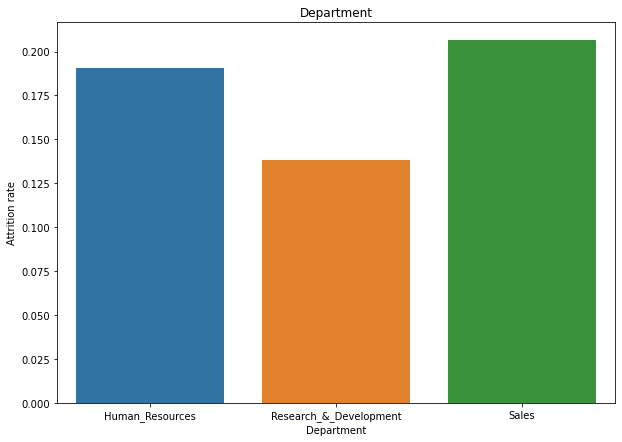

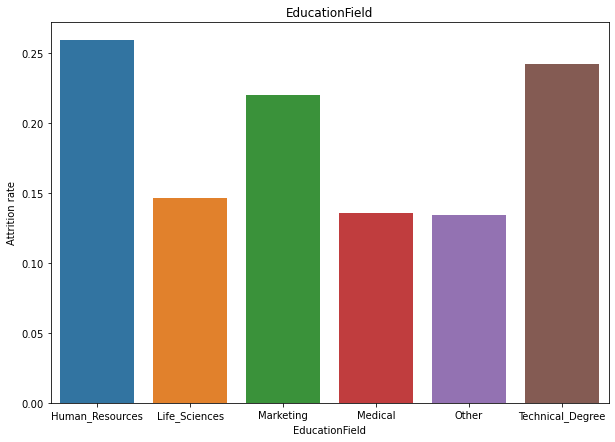

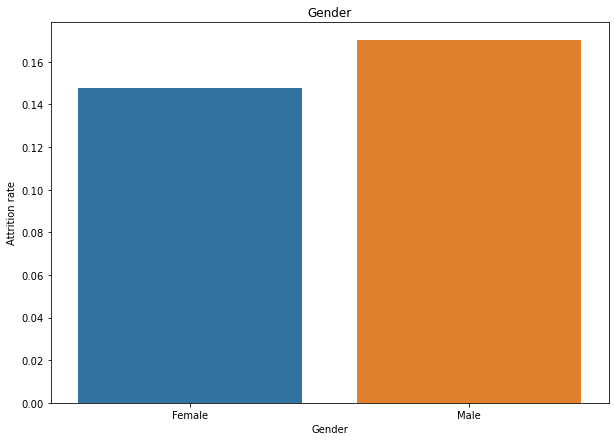

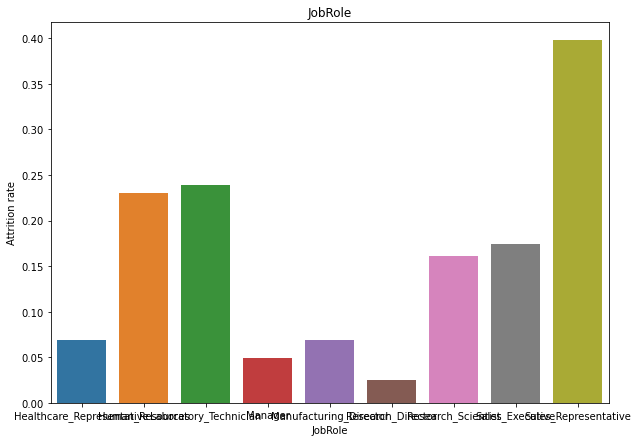

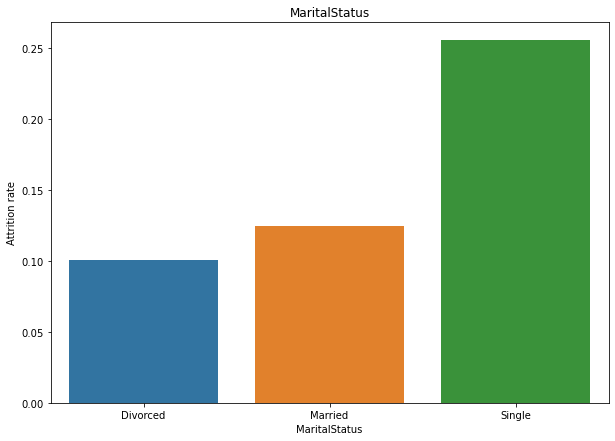

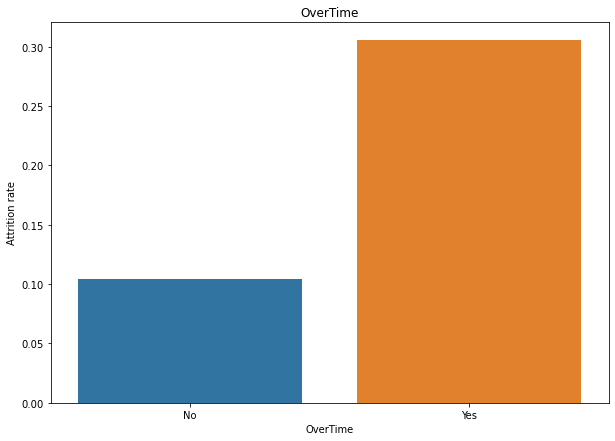

In [173]:
for i in cat_cols:
    churn_rate=pd.pivot_table(data,index = [i],values = 'Attrition',aggfunc='mean').reset_index()
    plt.figure(figsize = (10,7))
    sns.barplot(x=churn_rate.iloc[:,0], y=churn_rate.iloc[:,1])
    plt.title(i)
    plt.ylabel('Attrition rate')
    plt.show()

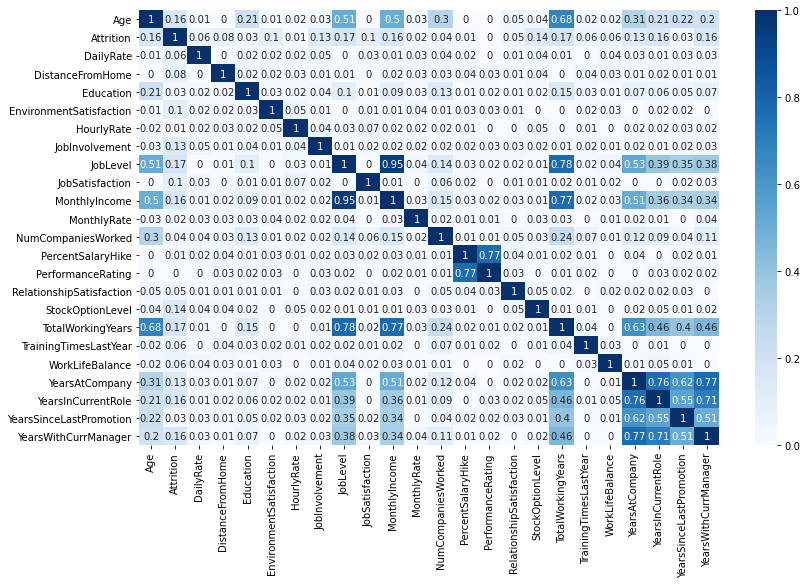

In [174]:
#Let's visualize correlations
plt.figure(figsize=(13,8))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "Blues")

# Modeling

In [175]:
X = data.drop('Attrition',axis=1)
Y=data.Attrition

In [176]:
X=pd.get_dummies(X, drop_first=True)

In [177]:
#splitting the data into train and test sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [178]:
logit=LogisticRegression(random_state=42)
logit.fit(X0,Y0)

/Users/zaranavasardyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [179]:
#calculating roc auc score
print("ROC_AUC Train:",roc_auc_score(Y0,logit.predict_proba(X0)[:,1]*100))
print("ROC_AUC Test:",roc_auc_score(Y1,logit.predict_proba(X1)[:,1]*100))

ROC_AUC Train: 0.7181511036932724
ROC_AUC Test: 0.6794270833333333


In [180]:
# remove outliers

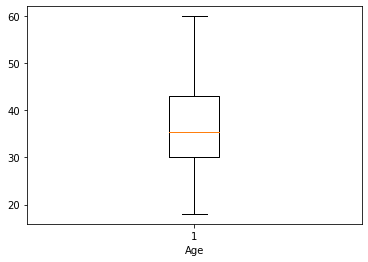

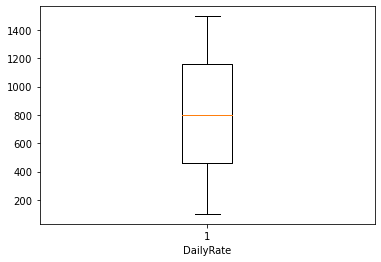

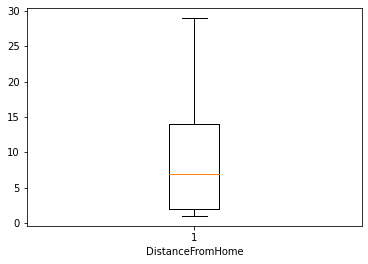

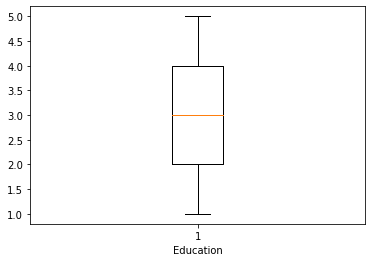

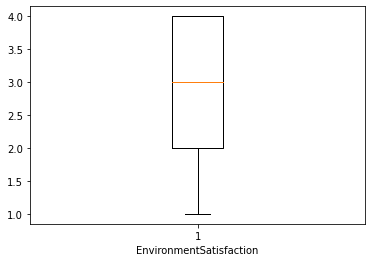

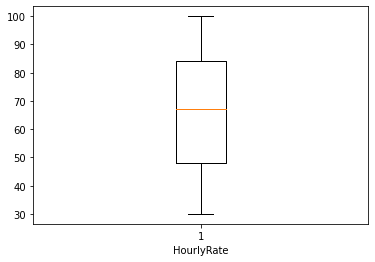

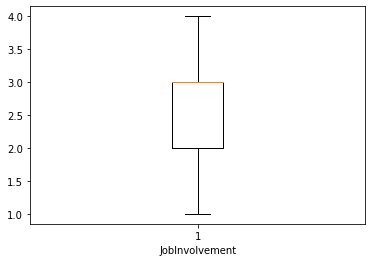

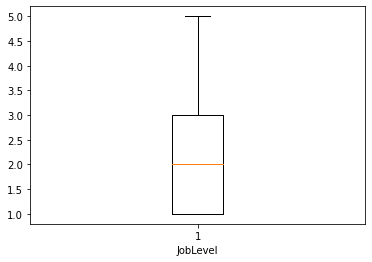

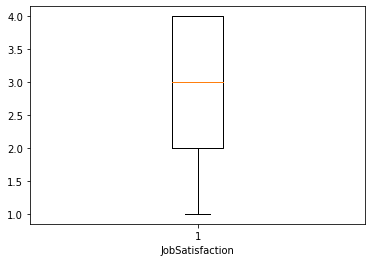

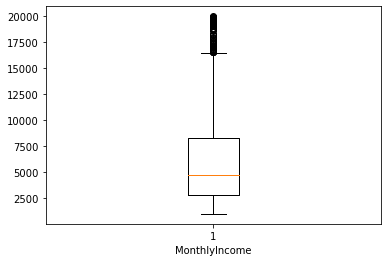

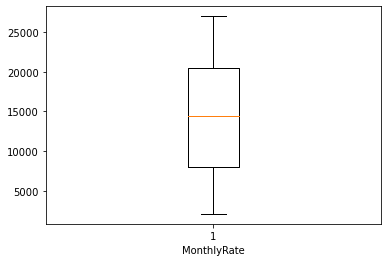

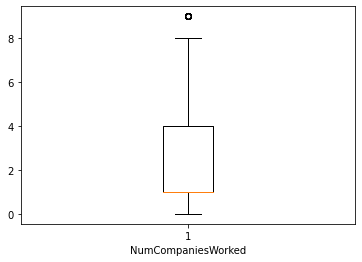

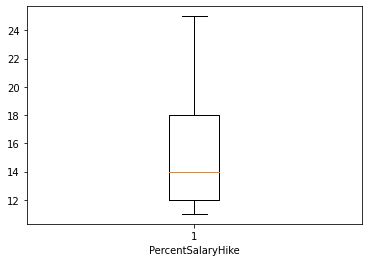

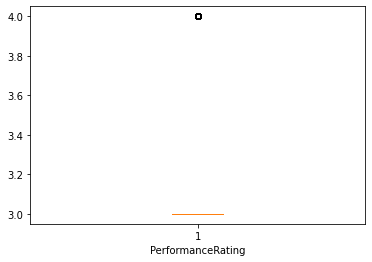

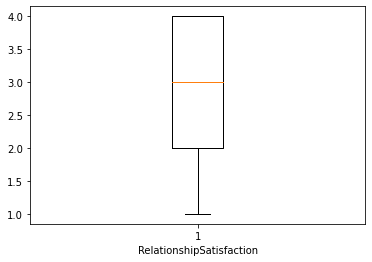

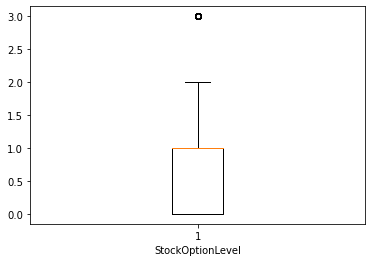

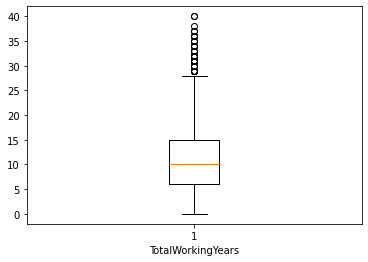

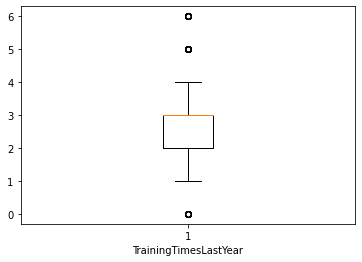

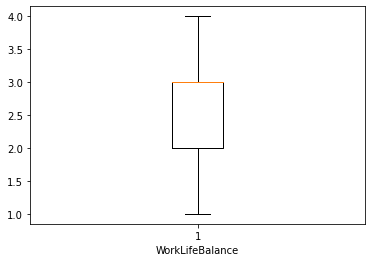

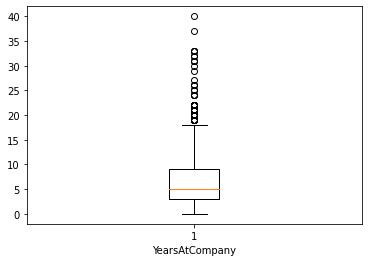

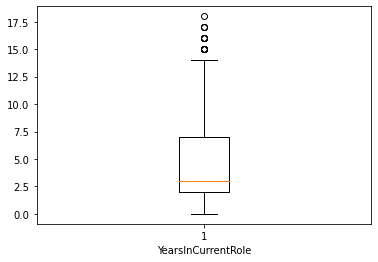

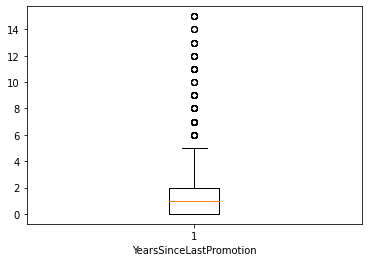

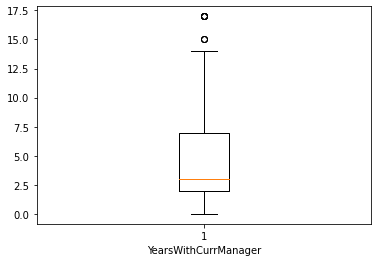

In [181]:
for i in num_cols:
    plt.boxplot(X0[i])
    plt.xlabel(i)
    plt.show()

In [182]:
X0.MonthlyIncome.describe()

count     1102.000000
mean      6385.641561
std       4713.602566
min       1009.000000
25%       2810.250000
50%       4726.000000
75%       8260.250000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [183]:
# checking outliers interquartile range
alpha = 1.5
q3,q2, q1 = np.percentile(X0.YearsWithCurrManager, [75 ,50,25])
iqr = q3 - q1
print('iqr:',iqr)
print('median:',q2)
lower = q1-iqr
upper = q3+iqr
print(f"based on IQR, the outlier are values bigger than {upper} and lower then {lower}")

iqr: 5.0
median: 3.0
based on IQR, the outlier are values bigger than 12.0 and lower then -3.0


In [184]:
print('Number of outliers:',  X0[(X0.YearsWithCurrManager<lower) | (X0.YearsWithCurrManager>upper)].shape)

Number of outliers: (21, 44)


In [207]:
Y0_new =  Y0[(X0.YearsWithCurrManager>=lower) & (X0.YearsWithCurrManager<=upper)]
X0_new =  X0[(X0.YearsWithCurrManager>=lower) & (X0.YearsWithCurrManager<=upper)]

In [208]:
logit1 = LogisticRegression(random_state = 42)
logit1.fit(X0_new,Y0_new)

/Users/zaranavasardyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [209]:
#calculating roc auc score
print("ROC_AUC Train:",roc_auc_score(Y0_new,logit1.predict_proba(X0_new)[:,1]*100))
print("ROC_AUC Test:",roc_auc_score(Y1,logit1.predict_proba(X1)[:,1]*100))

ROC_AUC Train: 0.7467775368706965
ROC_AUC Test: 0.6636067708333333


In [229]:
# we see that the results got worse here so we do not remove the outliers of YearsWithCurrManager and proceed with full data

#### removing some columns

In [210]:
coefs = pd.DataFrame({'feature':X0.columns.tolist(),'coef':logit.coef_[0].tolist()})
coefs['coef_abs']=coefs.coef.abs()
coefs=coefs.sort_values('coef_abs',ascending=False)

In [211]:
coefs

,feature,coef,coef_abs
20,YearsInCurrentRole,-4.897857e-02,4.897857e-02
2,DistanceFromHome,4.510222e-02,4.510222e-02
11,NumCompaniesWorked,4.431600e-02,4.431600e-02
22,YearsWithCurrManager,-4.052181e-02,4.052181e-02
19,YearsAtCompany,-2.384399e-02,2.384399e-02
16,TotalWorkingYears,-2.252687e-02,2.252687e-02
15,StockOptionLevel,-2.065500e-02,2.065500e-02
43,OverTime_Yes,2.011997e-02,2.011997e-02
0,Age,-1.791236e-02,1.791236e-02
8,JobSatisfaction,-1.779841e-02,1.779841e-02


In [212]:
cols_to_drop = coefs[coefs.coef_abs<0.005].feature.tolist()
print(cols_to_drop)

['JobRole_Sales_Representative', 'WorkLifeBalance', 'EducationField_Life_Sciences', 'JobRole_Research_Scientist', 'EducationField_Marketing', 'RelationshipSatisfaction', 'EducationField_Technical_Degree', 'JobRole_Laboratory_Technician', 'JobRole_Manufacturing_Director', 'EducationField_Medical', 'Gender_Male', 'JobLevel', 'Education', 'HourlyRate', 'JobRole_Sales_Executive', 'BusinessTravel_Travel_Rarely', 'JobRole_Research_Director', 'PerformanceRating', 'JobRole_Human_Resources', 'EducationField_Other', 'DailyRate', 'JobRole_Manager', 'PercentSalaryHike', 'MonthlyIncome', 'MonthlyRate']


In [213]:
X0_small = X0.drop(cols_to_drop,axis=1)
X1_small = X1.drop(cols_to_drop,axis=1)

In [214]:
logit2 = LogisticRegression(random_state = 42)
logit2.fit(X0_small,Y0)

/Users/zaranavasardyan/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [215]:
print("ROC_AUC Train:",roc_auc_score(Y0,logit2.predict_proba(X0_small)[:,1]*100))
print("ROC_AUC Test:",roc_auc_score(Y1,logit2.predict_proba(X1_small)[:,1]*100))

ROC_AUC Train: 0.8456104359718818
ROC_AUC Test: 0.7776041666666667


# Hyperparameter tuning and cross validation

In [216]:
X_small = X.drop(cols_to_drop,axis=1)

In [217]:
param_logit={'class_weight':[None,'balanced'],
            'C':np.linspace(1,10,50),
            'penalty':['l1', 'l2', 'elasticnet', 'none']}

In [218]:
gridsearch = GridSearchCV(estimator=LogisticRegression(random_state = 42,n_jobs = -1),
                        param_grid=param_logit,
                        cv=5,scoring='roc_auc',verbose=1,n_jobs = -1)

In [219]:
%%time
#note that we have 2x50x4=400 different combinations of C,class weight and penalty, and if we 
#choose number of folds, the total number of fits will be calculated by also mulpitlying that
# number-400*4=2000. So Gridsearch will implement 2000 fits and find best parameters using
#respective roc_auc scores. 
gridsearch.fit(X_small, Y)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:   16.6s


CPU times: user 1.48 s, sys: 77.3 ms, total: 1.55 s
Wall time: 23.7 s


[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   23.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([ 1.        ,  1.18367347,  1.36734694,  1.55102041,  1.73469388,
        1.91836735,  2.10204082,  2.28571429,  2.46938776,  2.65306122,
        2.83673469,  3.02040816,  3.20408163,  3.3877551 ,  3.57142857,
        3.75510204,  3.93877551,  4.12244898,  4.30612245,  4.48979592,
        4.67346939,  4.85714286,  5.04081633...
        5.59183673,  5.7755102 ,  5.95918367,  6.14285714,  6.32653061,
        6.51020408,  6.69387755,  6.87755102,  7.06122449,  7.24489796,
        7.42857143,  7.6122449 ,  7.79591837,  7.97959184,  8.16326531,
        8.34693878,  8.53061224,  8.71428571,  8.89795918,  9.08163265,
        9.26530612,  9.44897959,  9.63265306,  9.81632653, 10.        ]),
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbo

In [220]:
#let's see the optimal parameters
best_params = gridsearch.best_params_
best_params

{'C': 3.0204081632653064, 'class_weight': None, 'penalty': 'l2'}

In [221]:
#let's construct logit with the best parameters 
logit_final=LogisticRegression(class_weight=best_params['class_weight'],C=best_params['C'],
                          penalty = best_params['penalty'],random_state = 42,n_jobs = -1).fit(X0_small,Y0)

In [222]:
#making predictions
Y0_prob=logit_final.predict_proba(X0_small)[:,-1]
Y1_prob=logit_final.predict_proba(X1_small)[:,-1]

Y0_class=Y0_prob>0.1
Y1_class=Y1_prob>0.1

In [223]:
#calculating roc auc score
print("ROC_AUC Train:",roc_auc_score(Y0,Y0_prob)*100)
print("ROC_AUC Test:",roc_auc_score(Y1,Y1_prob)*100)

ROC_AUC Train: 84.5407604443749
ROC_AUC Test: 77.91666666666667


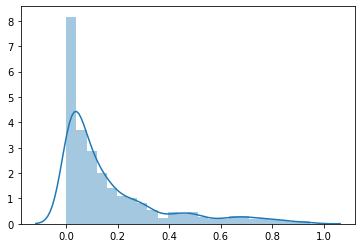

In [224]:
sns.distplot(Y0_prob)

In [225]:
results = pd.DataFrame({"Training_set":[accuracy_score(Y0,Y0_class),roc_auc_score(Y0,Y0_prob),recall_score(Y0, Y0_class)],
                              "Testing_set":[accuracy_score(Y1,Y1_class),roc_auc_score(Y1, Y1_prob),recall_score(Y1, Y1_class)]
                              },
                             index=['Accuracy','ROC_AUC_Score',"Recall"])
results

,Training_set,Testing_set
Accuracy,0.656987,0.635870
ROC_AUC_Score,0.845408,0.779167
Recall,0.851852,0.729167


In [226]:
#calculating using classification report
print("Logistic Regression Train:")
print(classification_report(Y0,Y0_class))

print("Logistic Regression Test:")
print(classification_report(Y1,Y1_class))

Logistic Regression Train:
              precision    recall  f1-score   support

           0       0.95      0.62      0.75       913
           1       0.32      0.85      0.46       189

    accuracy                           0.66      1102
   macro avg       0.63      0.73      0.60      1102
weighted avg       0.84      0.66      0.70      1102

Logistic Regression Test:
              precision    recall  f1-score   support

           0       0.94      0.62      0.75       320
           1       0.22      0.73      0.34        48

    accuracy                           0.64       368
   macro avg       0.58      0.68      0.55       368
weighted avg       0.85      0.64      0.70       368



In [227]:
#let's find cross validation score for the logit_final, you can see 5 different results for each fold
cv_scores=cross_val_score(logit_final,X_small,Y,cv=5,scoring="roc_auc")
cv_scores

array([0.82782859, 0.84840786, 0.81996727, 0.77973986, 0.83168232])

In [228]:
#mean cross vildation score
np.mean(cv_scores)

0.8215251778185367